# import the necessary packages

In [5]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider

# import the necessary packages
from helpers import pyramid
from helpers import sliding_window
import argparse
import time
import cv2

# Lecture de l image pour localiser du poulet

In [6]:
image2 = cv2.imread("00020.jpg")
(winW, winH) = (200, 200)

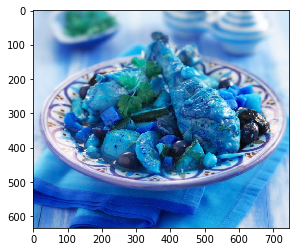

In [7]:
plt.imshow(image2)

# import du modele trainé et configuration des paramètres HOG


In [8]:
from PIL import Image, ImageOps 
import matplotlib.pyplot as plt

svc = joblib.load('svc_poulet095.pkl')
scaler = joblib.load('scaler_poulet095.pkl')

sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 11,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

classifier = BinaryClassifier(svc, scaler)
start_frame = image2
#im2 =  cv2.resize(start_frame,(120,480))



sourcer = FeatureSourcer(sourcer_params, start_frame)

# Utiliser la methode sliding window pour localiser l'ingredient dans l'image

In [ ]:
scores = []
boxes_per_scale=[]
for resized in pyramid(image2, scale=1.5):
    number_prediction = 0
    number_positive = 0
    boxes = []
    for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        ymax = window.shape[0] + y
        xmax = window.shape[1] + x
        slicer = image2[y:ymax,x:xmax,:]
        slicer2 =  cv2.resize(slicer,(400,600))
        #print(slicer2.shape)
        features = sourcer.features(slicer2)
        a = classifier.predict(features)
        print(a)
        number_prediction = number_prediction + 1
        print(number_prediction)
        if a == 1:
            number_positive = number_positive + 1
            cv2.rectangle(image2, (x, y), (x + winW, y + winH), (255, 255, 0), 2)
            cv2.putText(image2,'Poulet',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
            cv2.imshow("Window", image2)  # Affichage de la fenetre lorsque du poulet est detecté
            cv2.waitKey(1)


0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0
13
0
14
0
15
0
16
0
17
0
18
0
19
0
20
0
21
0
22
0
23
0
24
0
25
0
26
0
27
0
28
0
29
0
30
0
31
0
32
0
33
0
34
0
35
0
36
0
37
0
38
0
39
0
40
0
41
0
42
0
43
0
44
0
45
0
46
0
47
0
48
0
49
0
50
0
51
0
52
0
53
0
54
0
55
0
56
0
57
0
58
0
59
0
60
0
61
1
62
1
63
0
64
0
65
0
66
0
67
0
68
0
69
0
70
0
71
0
72
0
73
0
74
1
75
1
76
1
77
1
78
0
79
0
80
0
81
1
82
1
83
1
84
0
85
1
86
0
87
0
88
0
89
0
90
0
91
0
92
1
93
1
94
1
95
1
96
